In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('database/arquivo_finalizado.csv', index_col=0)

In [5]:
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
0,61.853,97.776,100.690,45.327,51.162,88.052,91.493,82.091,33.664,78.342,62.154,106.240,100.280,90.872,87.979,50.855,69.568,0
1,38.509,70.903,70.405,21.763,30.156,70.470,77.080,62.330,28.126,68.320,45.450,91.900,85.314,77.508,73.877,40.292,64.877,0
2,17.896,63.080,64.223,21.413,31.114,70.686,77.777,55.867,40.359,75.387,45.833,92.284,89.465,77.019,75.160,40.456,70.583,0
3,84.540,116.240,115.440,83.330,89.471,117.550,105.230,88.113,69.171,113.350,88.175,135.150,133.510,114.410,108.560,59.009,80.047,0
4,47.894,77.013,75.450,43.895,49.776,77.842,69.193,51.890,41.267,77.936,54.341,96.539,92.856,78.813,74.918,32.463,66.568,0


In [9]:
df[df['Classe'] == 3]

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
4339440,-14.7200,-5.1578,11.1490,-31.773,-28.846,2.57250,15.8870,31.740,-29.2550,-9.5757,6.6838,20.6590,18.3830,12.91600,15.4620,15.1400,-28.016,3
4339441,-15.2450,-7.5728,11.2380,-34.889,-32.137,0.47465,10.7920,23.680,-29.8790,-1.5998,1.4769,18.4820,14.3040,8.08330,12.3560,5.0061,-37.471,3
4339442,-9.1023,-6.6271,7.8890,-31.759,-28.961,-6.93530,2.9035,26.735,-32.3780,-24.3020,-14.2610,-1.0542,-3.4065,-5.18460,-2.2926,-1.9246,-24.441,3
4339443,-1.7880,-1.5305,9.9466,-26.845,-22.127,-5.23610,2.2964,30.054,-22.9390,-36.3610,-11.7210,-2.7601,-1.1280,-0.24111,1.0209,5.8795,-26.467,3
4339444,-4.3948,-3.4611,9.7386,-26.715,-22.616,-4.52300,6.2512,24.796,-22.8160,-30.1870,-9.9945,-2.5126,-3.7030,0.27504,5.0027,12.5410,-23.336,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785915,-142.5300,-151.3900,-128.2000,-143.620,-142.080,-108.28000,-98.6080,-91.694,-7.1128,-88.1520,-80.2020,-95.8130,-48.6100,-70.58700,-78.6370,-77.5940,-51.188,3
5785916,-149.2600,-136.7500,-112.4100,-149.850,-149.900,-118.44000,-92.8020,-104.270,-18.9060,-93.7870,-78.4770,-82.6550,-40.2330,-60.06900,-72.0870,-94.9620,-47.190,3
5785917,-151.6400,-151.5000,-139.8400,-145.770,-143.670,-138.64000,-95.9510,-110.130,-28.7720,-103.9300,-87.4410,-102.2800,-52.5310,-90.13000,-92.3270,-88.5120,-66.108,3
5785918,-177.4400,-189.1300,-180.2800,-174.420,-169.400,-150.03000,-124.4400,-130.640,-55.5700,-121.8200,-112.4500,-134.5100,-91.3480,-128.47000,-127.5300,-91.8850,-104.300,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5785920 entries, 0 to 5785919
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   E1      float64
 1   E2      float64
 2   E3      float64
 3   E4      float64
 4   E5      float64
 5   E6      float64
 6   E7      float64
 7   E8      float64
 8   E9      float64
 9   E10     float64
 10  E11     float64
 11  E12     float64
 12  E13     float64
 13  E14     float64
 14  E15     float64
 15  E16     float64
 16  E17     float64
 17  Classe  int64  
dtypes: float64(17), int64(1)
memory usage: 838.7 MB


In [11]:
df.describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,Classe
count,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06,5.785920e+06
mean,-9.879507e+00,-8.814849e+00,-9.555520e+00,-7.941530e+00,-6.076094e+00,-3.943131e+00,-5.786126e+00,-7.555178e+00,-2.890368e+00,-3.461190e+00,-2.416732e+00,-2.355858e+00,-1.405622e+00,-1.585020e+00,-2.322477e+00,-2.522786e+00,-2.777557e+00,1.500000e+00
std,1.123877e+02,1.123163e+02,1.168969e+02,1.090756e+02,9.288788e+01,8.413306e+01,9.236491e+01,1.093582e+02,8.185803e+01,7.991500e+01,7.266843e+01,7.265652e+01,7.405938e+01,8.141009e+01,7.338193e+01,7.901800e+01,7.754108e+01,1.118034e+00
min,-1.586300e+03,-1.823500e+03,-1.649900e+03,-1.534700e+03,-1.427200e+03,-9.986900e+02,-1.341000e+03,-1.386500e+03,-1.064900e+03,-9.226500e+02,-9.164600e+02,-7.725300e+02,-1.548000e+03,-1.799500e+03,-1.067700e+03,-1.038000e+03,-9.764900e+02,0.000000e+00
25%,-4.447500e+01,-4.209000e+01,-4.438700e+01,-4.412000e+01,-3.799200e+01,-3.301300e+01,-3.641000e+01,-4.276900e+01,-3.335100e+01,-3.323025e+01,-2.943800e+01,-2.909100e+01,-2.752700e+01,-2.849000e+01,-2.881900e+01,-3.009000e+01,-2.975600e+01,7.500000e-01
50%,-5.707900e+00,-5.719550e+00,-6.046500e+00,-5.004600e+00,-4.656800e+00,-3.533100e+00,-4.217550e+00,-4.890700e+00,-3.275900e+00,-3.338400e+00,-2.517100e+00,-2.225350e+00,-2.025000e+00,-2.228200e+00,-2.436900e+00,-2.289100e+00,-2.529850e+00,1.500000e+00
75%,2.600600e+01,2.549100e+01,2.674600e+01,2.914900e+01,2.508200e+01,2.330200e+01,2.411900e+01,2.799600e+01,2.520200e+01,2.495200e+01,2.298100e+01,2.308300e+01,2.257600e+01,2.287800e+01,2.259800e+01,2.405300e+01,2.227500e+01,2.250000e+00
max,1.565000e+03,1.817300e+03,1.977400e+03,1.463200e+03,1.478100e+03,1.233800e+03,1.751500e+03,1.801800e+03,1.271000e+03,1.366500e+03,1.168500e+03,9.503100e+02,2.043300e+03,2.348600e+03,1.327000e+03,1.303700e+03,1.327300e+03,3.000000e+00


13776 inputs de uma série temporal para 109 séries temporais por classe

In [13]:
df.shape

(5785920, 18)

In [14]:
5785920/13776

420.0

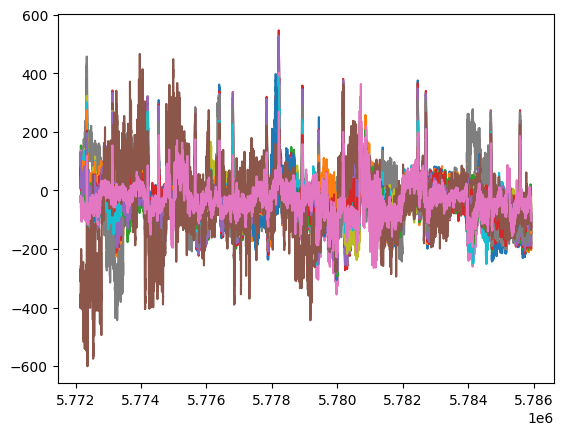

In [35]:

for i in df.columns.drop('Classe'):
    parametro = secoes[419][i]
    plt.plot(parametro.index, parametro)

In [27]:
def seccionar_dataframe(dataframe, intervalo):
    secoes = []
    num_linhas = len(dataframe)

    for i in range(0, num_linhas, intervalo):
        secao = dataframe.iloc[i:i+intervalo]
        secoes.append(secao)

    return secoes

In [28]:
secoes = seccionar_dataframe(df, 13776)